In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [41]:
from sklearn.datasets import load_iris

In [42]:
flower_data = load_iris()

In [43]:
print(flower_data.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [44]:
flower_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
flower_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
#Converting the data to a pandas dataframe
df = pd.DataFrame(flower_data.data, columns=flower_data.feature_names)

#adding another column for the target and we will call it 'species'
df['species'] = flower_data.target

#Since target is a numerical representation. We will map the corresponding target_names
df['species'] = df['species'].apply(lambda x: flower_data.target_names[x])

#displaying the first top 5 data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

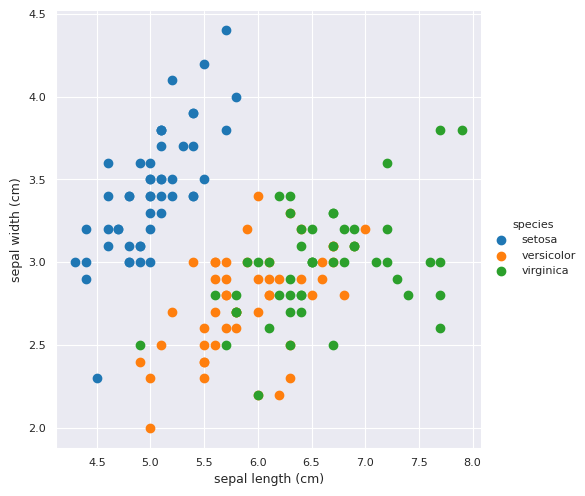

In [48]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='species', height=5)\
.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')\
.add_legend()

plt.show()

In [49]:
#import the train_test_split

#split the data: 70% training and 30% test
features_train, features_test, labels_train, labels_test = train_test_split(
    df.drop(['sepal length (cm)','sepal width (cm)', 'species'], axis=1), flower_data.target, 
    test_size=0.30, random_state=42)


#initialize the classifier
rfc = RandomForestClassifier()

# train the classifier using the training data
rfc.fit(features_train, labels_train)

predictions = rfc.predict(features_test)

print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [50]:
print(confusion_matrix(labels_test, predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
